## Lunar Lander with PPO

TODO Describe this notebook

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Forcefully remove the old 'gym' package to avoid conflicts in Colab
%pip uninstall -y gym
%pip install -qr https://raw.githubusercontent.com/anton-dergunov/hugging-face-deep-rl/main/requirements.txt

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [10]:
import os

repo_url = "https://github.com/anton-dergunov/hugging-face-deep-rl.git"
local_src = os.path.abspath("../src/rlcourse")
target_dir = "hugging-face-deep-rl"

if os.path.isdir(local_src):
    # Local dev install (use repo root as cwd)
    !pip install --quiet -e ..
    print("✅ Using local rlcourse package")
else:
    # Remote: clone repo if missing, then install
    if not os.path.exists(target_dir):
        !git clone {repo_url} {target_dir}
    !pip install --quiet -e {target_dir}
    print("✅ Cloned and installed rlcourse package")

✅ Using local rlcourse package


In [4]:
from IPython.display import Video
import matplotlib.pyplot as plt

import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.results_plotter import plot_results
from stable_baselines3.common import results_plotter

from rlcourse.hf_utils import HuggingFaceModelHub
import rlcourse.gymnasium_utils as utils

In [11]:
utils.setup_ignore_warnings()

In [30]:
ENV_ID = "LunarLander-v3"
MODEL_NAME = "LunarLander_PPO"
REPO_ID = f"AntonDergunov/{MODEL_NAME}"

LEARN_STEPS = 1_000_000

In [8]:
MODEL_PATH = f"models/{MODEL_NAME}.zip"
VIDEO_PATH = f"videos/{MODEL_NAME}.mp4"
LOGS_PATH = f"logs/{MODEL_NAME}"

os.makedirs(os.path.dirname(MODEL_PATH), exist_ok=True)
os.makedirs(os.path.dirname(VIDEO_PATH), exist_ok=True)
os.makedirs(LOGS_PATH, exist_ok=True)

### Environment

[Lunar Lander](https://gymnasium.farama.org/environments/box2d/lunar_lander/) is a classic rocket trajectory optimization problem.

Observation Space:
1. x coordinate (horizontal position)
2. y coordinate (vertical position)
3. horizontal velocity
4. vertical velocity
5. lander angle
6. angular velocity
7. is left leg touching ground? (boolean)
8. is right leg touching ground? (boolean)

Action Space - 4 discrete actions:
- 0 = do nothing
- 1 = fire left orientation engine
- 2 = fire main engine
- 3 = fire right orientation engine

The lander starts at the top center of the viewport with a random initial force applied to its center of mass.

Episode finishes if the lander:
- crashes (gets in contact with the moon)
- gets outside of the viewpoint
- is not awake (does not move and does not collide)

"At each step, the reward:

- is increased/decreased the closer/further the lander is to the landing pad.
- is increased/decreased the slower/faster the lander is moving.
- is decreased the more the lander is tilted (angle not horizontal).
- is increased by 10 points for each leg that is in contact with the ground.
- is decreased by 0.03 points each frame a side engine is firing.
- is decreased by 0.3 points each frame the main engine is firing.

The episode receive an additional reward of -100 or +100 points for crashing or landing safely respectively.

An episode is considered a solution if it scores at least 200 points."

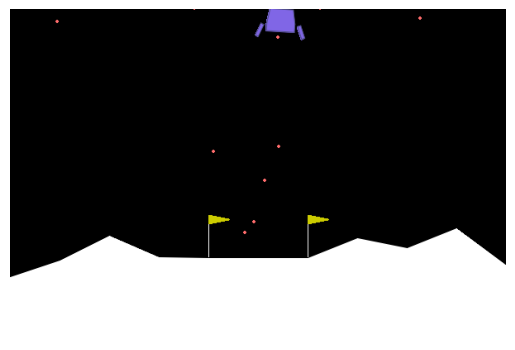

In [ ]:
utils.show_environment(ENV_ID)

In [19]:
vec_env = make_vec_env(ENV_ID, n_envs=4, monitor_dir=LOGS_PATH)

In [ ]:
utils.describe_environment(vec_env)

Observation Space:
  Box(shape=(8,), dtype=float32, low=-10.0, high=10.0)
  Example observation: [ 0.41224033  1.3086056   8.883539   -9.431838   -2.6359231  -4.824621
  0.32064357  0.11574553]

Action Space:
  Discrete(n=4)
  Example action: 1

Max episode steps: 1000


### Model

TODO Describe the parameters below

TODO Run on GPU?

In [31]:
model = PPO(
    policy = 'MlpPolicy',
    env = vec_env,
    n_steps = 1024,
    batch_size = 64,
    n_epochs = 4,
    gamma = 0.999,
    gae_lambda = 0.98,
    ent_coef = 0.01,
    verbose=1)

Using cpu device


In [32]:
model.learn(total_timesteps=LEARN_STEPS)

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 88.4     |
|    ep_rew_mean     | -191     |
| time/              |          |
|    fps             | 7579     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 4096     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 91.1        |
|    ep_rew_mean          | -176        |
| time/                   |             |
|    fps                  | 6531        |
|    iterations           | 2           |
|    time_elapsed         | 1           |
|    total_timesteps      | 8192        |
| train/                  |             |
|    approx_kl            | 0.003505719 |
|    clip_fraction        | 0.0123      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.38       |
|    explained_variance   | 0.00133     |
|    learning_rate        | 0.

In [33]:
# Save the trained model
model.save(MODEL_PATH)

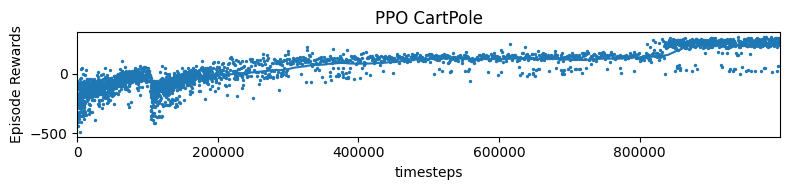

In [34]:
# Plot results using Stable-Baselines3 helper
plot_results([LOGS_PATH], LEARN_STEPS, results_plotter.X_TIMESTEPS, "PPO CartPole")
plt.show()

### Evaluate

In [ ]:
# Load the saved model
model = PPO.load(MODEL_PATH, device="cpu")

In [37]:
metrics = utils.evaluate_model(model, ENV_ID)
print(metrics)

{'mean_reward': np.float64(264.91025240000005), 'std_reward': np.float64(19.753393285229603), 'n_eval_episodes': 10}


In [68]:
utils.record_agent_video(model, ENV_ID, video_path=VIDEO_PATH, steps=1000)

Saved video to videos/LunarLander_PPO.mp4


In [69]:
Video(VIDEO_PATH, embed=True)

### Hugging Face

In [5]:
hub = HuggingFaceModelHub()
hub.login_if_needed(interactive=True)

✅ Hugging Face credentials already available. Hello


In [7]:
hub.hello()

hello2


In [8]:
hub.hello2()

hello2-


In [8]:
dir(hub)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_default_readme',
 'api',
 'delete_repo',
 'download_model_file',
 'login_if_needed',
 'upload_model_file']

In [76]:
usage = f"""
```python
import gymnasium as gym
from stable_baselines3 import PPO
from huggingface_hub import hf_hub_download

model_path = hf_hub_download(repo_id="{REPO_ID}", filename="model.zip")
model = PPO.load(model_path, device="cpu")

env = gym.make("{ENV_ID}")
obs, info = env.reset()

for _ in range(1000):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        obs, info = env.reset()
```
"""

hub.upload_model_file(
    repo_id=REPO_ID,
    file=MODEL_PATH,
    filename="model.zip",
    model_name=MODEL_NAME,
    library="Stable-Baselines3",
    algo="PPO",
    env_id=ENV_ID,
    metrics=metrics,
    video_file=VIDEO_PATH,
    readme_extra=usage,
)

✅ Hugging Face credentials already available.
Uploading model.zip to AntonDergunov/LunarLander_PPO ... | size=146.64 KB | sha256=296bab099408fcef9871333f31f7a64bfd0633c6a0bb625509f7d041e37ebd49


Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

  models/LunarLander_PPO.zip            : 100%|##########|  150kB /  150kB            

No files have been modified since last commit. Skipping to prevent empty commit.
No files have been modified since last commit. Skipping to prevent empty commit.
No files have been modified since last commit. Skipping to prevent empty commit.


Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

  videos/LunarLander_PPO.mp4            : 100%|##########|  309kB /  309kB            


✅ Upload complete! View the model at:
https://huggingface.co/AntonDergunov/LunarLander_PPO


In [77]:
hub_model_file = hub.download_model_file(repo_id=REPO_ID, filename="model.zip")
model = PPO.load(hub_model_file, device="cpu")

env = gym.make(ENV_ID)
obs, info = env.reset()

for _ in range(1000):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        obs, info = env.reset()

print("✅ Model loaded from Hugging Face and tested successfully!")

model.zip:   0%|          | 0.00/150k [00:00<?, ?B/s]

Downloaded /Users/anton/.cache/huggingface/hub/models--AntonDergunov--LunarLander_PPO/snapshots/6b94485cf9525edc02016e806ad58300fd6bde0d/model.zip | size=146.64 KB | sha256=296bab099408fcef9871333f31f7a64bfd0633c6a0bb625509f7d041e37ebd49
✅ Model loaded from Hugging Face and tested successfully!
